<a href="https://colab.research.google.com/github/FilipeMadeira13/analise-de-gastos-pessoais/blob/main/analise_de_gastos_pessoais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando a biblioteca pandas

In [1]:
import pandas as pd

## Lendo o dataset

In [11]:
df = pd.read_csv('/content/budget_data.csv')

In [12]:
df.head()

,date,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50


## Checando o tamanho do dataset

In [13]:
df.shape

(3608, 3)

## Verificando os tipos, percebe-se que a coluna Amount já é do tipo float

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3608 non-null   object 
 1   category  3608 non-null   object 
 2   amount    3608 non-null   float64
dtypes: float64(1), object(2)
memory usage: 84.7+ KB


## Checando valores nulos

In [15]:
df.isnull().sum()

,0
date,0
category,0
amount,0


## Verificando o total gasto

In [16]:
total_expenditure = df['amount'].sum()

In [18]:
print(f'O total gasto é de R$ {total_expenditure:.2f}.')

O total gasto é de R$ 61805.91.


## Convertendo a coluna date para o formato datetime

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      3608 non-null   datetime64[ns, UTC]
 1   category  3608 non-null   object             
 2   amount    3608 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 84.7+ KB


## Criando a coluna year

In [26]:
df['year'] = df['date'].dt.year

In [27]:
df.head()

,date,category,amount,year
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,2022
1,2022-07-06 05:57:27+00:00,Market,2.00,2022
2,2022-07-06 05:58:12+00:00,Coffe,30.10,2022
3,2022-07-06 05:58:25+00:00,Market,17.33,2022
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,2022


## Criando a coluna month

In [29]:
df['month'] = df['date'].dt.month

In [30]:
df.head()

,date,category,amount,year,month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,2022,7
1,2022-07-06 05:57:27+00:00,Market,2.00,2022,7
2,2022-07-06 05:58:12+00:00,Coffe,30.10,2022,7
3,2022-07-06 05:58:25+00:00,Market,17.33,2022,7
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,2022,7


## Me certificando que o dataset está ordenado pela data

In [37]:
df = df.sort_values(by='date')

In [38]:
df.head()

,date,category,amount,year,month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,2022,7
1,2022-07-06 05:57:27+00:00,Market,2.00,2022,7
2,2022-07-06 05:58:12+00:00,Coffe,30.10,2022,7
3,2022-07-06 05:58:25+00:00,Market,17.33,2022,7
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,2022,7


## Verificando o mês que ocorreu o maior gasto

In [44]:
year, month = df.groupby(['year', 'month'])['amount'].sum().idxmax()
amount = df.groupby(['year', 'month'])['amount'].sum().max()

In [46]:
print(f'Maior gasto em: {month:02d}/{year} como o total de R$ {amount:.2f}')

Maior gasto em: 07/2024 como o total de R$ 5509.49


## Agrupando por categoria e calculando:

### Total gasto

In [57]:
total = df.groupby('category')['amount'].sum().sort_values(ascending=False)

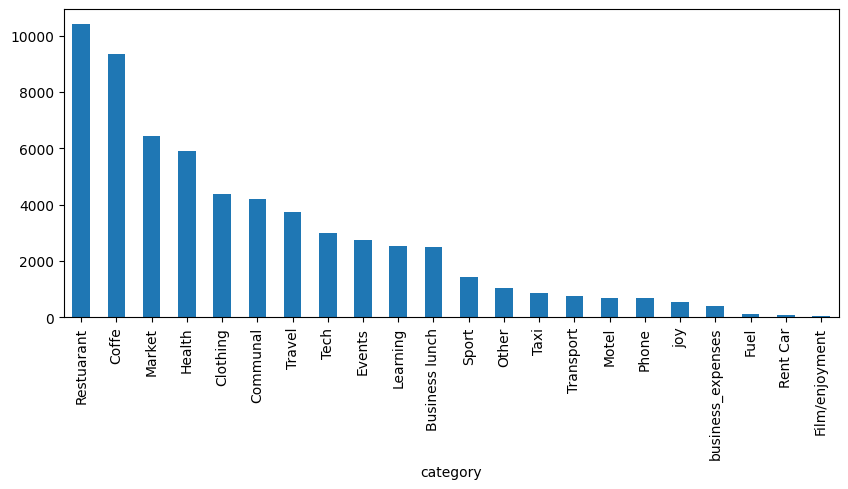

In [59]:
total.plot(kind='bar', figsize=(10,4));

## Gasto médio

In [60]:
average_spending = df.groupby('category')['amount'].mean().sort_values(ascending=False)

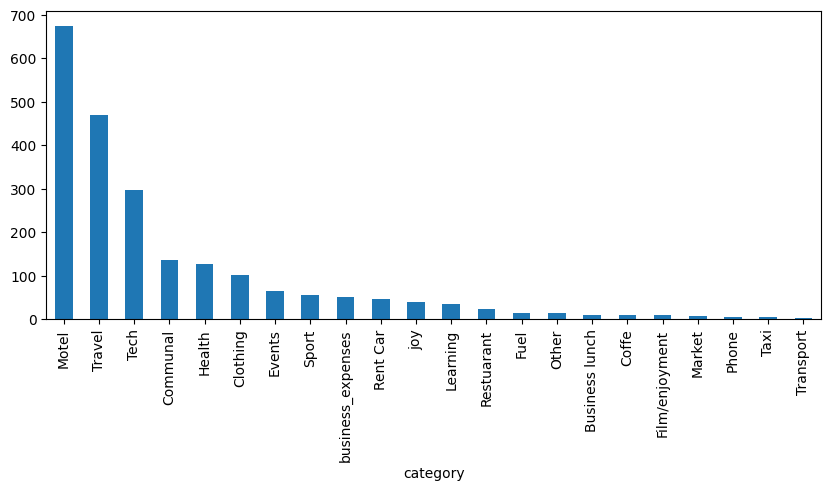

In [61]:
average_spending.plot(kind='bar', figsize=(10,4));

## Quantidade de transações

In [63]:
transactions = df.groupby('category')['amount'].count().sort_values(ascending=False)

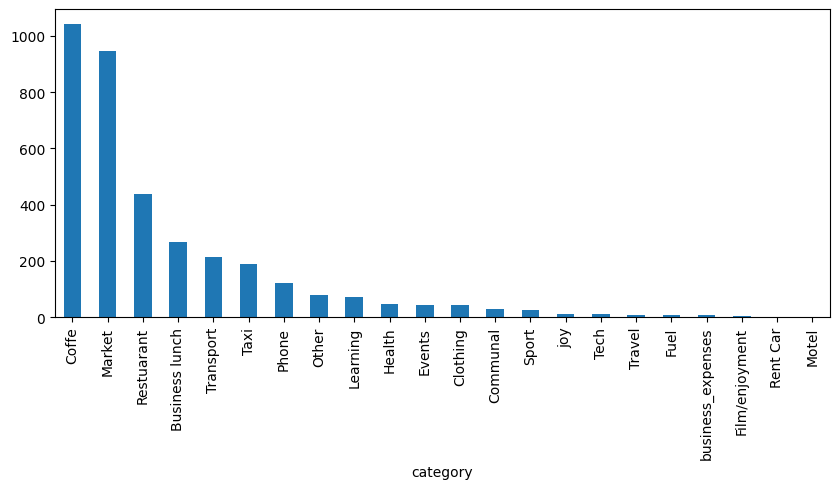

In [64]:
transactions.plot(kind='bar', figsize=(10,4));

## Agrupando os gastos por mês

### Calculando o total mensal

In [69]:
monthly_expenses = df.groupby(['year', 'month'])['amount'].sum()
monthly_expenses

year  month
2022  7        2861.38
      8        1307.52
      9        1338.48
      10       2001.12
      11       1017.81
      12       1605.53
2023  1        2162.19
      2        1540.84
      3        2274.61
      4        2224.88
      5        2599.92
      6        1935.36
      7        5192.72
      8        1123.74
      9        1629.95
      10       1728.26
      11       1428.31
      12       1810.44
2024  1        4068.93
      2        1250.66
      3        1559.18
      4        1706.30
      5        4021.46
      6        2644.02
      7        5509.49
      8        2194.54
      9        3068.27
Name: amount, dtype: float64

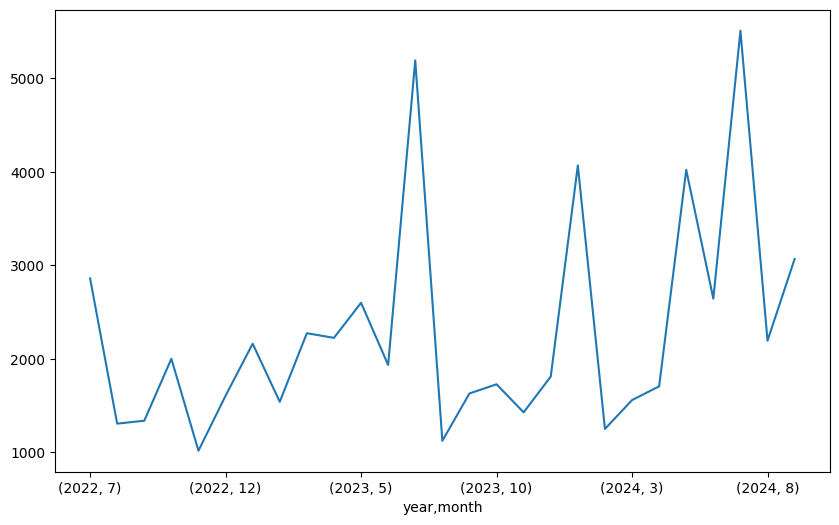

In [74]:
monthly_expenses.plot(kind='line', figsize=(10,6));


## Filtrando os gastos acima da média

In [80]:
above_average_expenses = df[df['amount'] > df['amount'].mean()]

In [81]:
above_average_expenses

,date,category,amount,year,month
2,2022-07-06 05:58:12+00:00,Coffe,30.10,2022,7
3,2022-07-06 05:58:25+00:00,Market,17.33,2022,7
25,2022-07-09 06:37:03+00:00,Restuarant,48.00,2022,7
27,2022-07-10 05:45:45+00:00,Transport,21.00,2022,7
28,2022-07-10 18:15:13+00:00,Other,20.00,2022,7
...,...,...,...,...,...
3516,2024-09-15 15:52:46+00:00,Restuarant,178.00,2024,9
3533,2024-09-17 18:08:17+00:00,Restuarant,40.00,2024,9
3537,2024-09-18 09:47:46+00:00,Events,30.00,2024,9
3544,2024-09-19 14:28:19+00:00,business_expenses,24.00,2024,9


## Filtrando os gastos com restaurante

In [83]:
restuarant = df[df['category'] == 'Restuarant']

In [86]:
restuarant.sort_values('amount', ascending=False)

,date,category,amount,year,month
1286,2023-04-10 19:16:41+00:00,Restuarant,223.0,2023,4
1130,2023-03-04 08:51:57+00:00,Restuarant,200.0,2023,3
3516,2024-09-15 15:52:46+00:00,Restuarant,178.0,2024,9
2963,2024-06-06 11:43:07+00:00,Restuarant,150.0,2024,6
2981,2024-06-09 13:21:39+00:00,Restuarant,123.0,2024,6
...,...,...,...,...,...
3037,2024-06-21 10:29:00+00:00,Restuarant,2.0,2024,6
235,2022-09-06 16:30:26+00:00,Restuarant,1.0,2022,9
259,2022-09-12 15:23:18+00:00,Restuarant,1.0,2022,9
1928,2023-09-06 14:41:29+00:00,Restuarant,1.0,2023,9


# Insights finais

## Onde o dinheiro é mais gasto?

In [88]:
df.groupby('category')['amount'].sum().idxmax()

'Restuarant'

Restaurante

## Existe sazonalidade nos gastos?

Percebe-se mais gastos no meio do ano

## Identificando os 5 maiores gastos individuais

In [89]:
df.sort_values('amount', ascending=False).head()

,date,category,amount,year,month
1789,2023-07-26 18:16:43+00:00,Travel,2500.00,2023,7
2466,2024-01-30 17:17:33+00:00,Health,2450.00,2024,1
3164,2024-07-17 07:45:50+00:00,Tech,2222.00,2024,7
2793,2024-05-03 17:12:52+00:00,Health,2100.00,2024,5
69,2022-07-28 19:19:02+00:00,Travel,733.25,2022,7


Gastos com viagens, saúde e tecnologia.